### Machine Learning for Data Quality Prediction
**Description**: Use a machine learning model to predict data quality issues.

**Steps**:
1. Create a mock dataset with features and label (quality issue/label: 0: good, 1: issue).
2. Train a machine learning model.
3. Evaluate the model performance.

Accuracy: 0.66

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.91      0.78        66
           1       0.50      0.18      0.26        34

    accuracy                           0.66       100
   macro avg       0.59      0.54      0.52       100
weighted avg       0.62      0.66      0.60       100



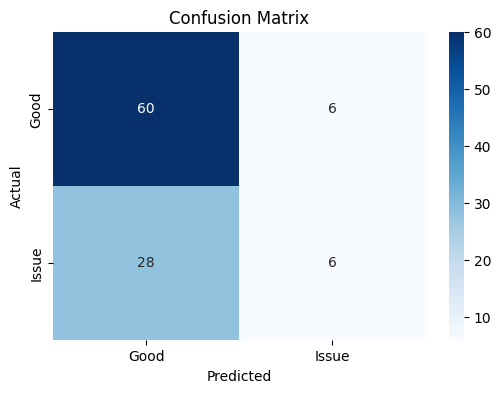

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a Mock Dataset
np.random.seed(42)
data_size = 500

# Simulated features
data = pd.DataFrame({
    "missing_values_ratio": np.random.rand(data_size),                   # % of missing values
    "duplicates_count": np.random.randint(0, 100, size=data_size),       # number of duplicates
    "inconsistent_format_ratio": np.random.rand(data_size),             # % of inconsistent formatting
    "outlier_score": np.random.rand(data_size),                         # outlier score (e.g., from isolation forest)
    "quality_label": np.random.choice([0, 1], size=data_size, p=[0.7, 0.3])  # 0: good, 1: issue
})

# Step 2: Train a Machine Learning Model
X = data.drop("quality_label", axis=1)
y = data["quality_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Evaluate the Model Performance
y_pred = model.predict(X_test)

# Accuracy & classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Issue"], yticklabels=["Good", "Issue"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

